In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import gym

In [3]:
from time import sleep

In [4]:
from gym.envs.registration import register

register(
    id="FrozenLakeNoSlippery-v0",
    entry_point="gym.envs.toy_text:FrozenLakeEnv",
    kwargs={"map_name": "4x4", "is_slippery":False},
    max_episode_steps=100,
    reward_threshold=0.78
)

In [5]:
from IPython.display import clear_output

In [6]:
env = gym.make("FrozenLakeNoSlippery-v0")
env.reset()

for step in range(15):
    env.render()
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    sleep(0.5)
    clear_output(wait=True)
    if done:
        env.reset()
env.close()

  (Up)
SFFF
FHFH
FFFH
HFFG


In [7]:
action_size = env.action_space.n
state_size = env.observation_space.n

q_table = np.zeros([state_size, action_size])

In [8]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
EPOCHS = 20000 # how many times the agent plays the game in its entirety
ALPHA = 0.8 # learning rate
GAMMA = 0.95 # discount rate

In [10]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

In [11]:
def epsilon_greedy_action_selection(epsilon, q_table, discrete_state):
    random_number = np.random.random()
    # exploitation
    if random_number > epsilon:
        state_row = q_table[discrete_state, :]
        action = np.argmax(state_row)
    # exploration
    else:
        action = env.action_space.sample()
        
    return action

In [12]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    return old_q_value + ALPHA * (reward + GAMMA * next_optimal_q_value - old_q_value)

In [13]:
def reduce_epsilon(epsilon, epoch):
    return min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * epoch)

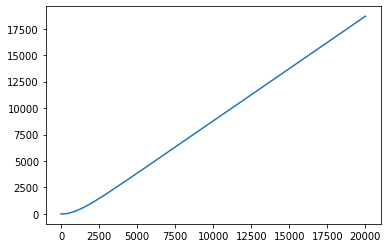

In [14]:
rewards = []
log_interval = 1000

#########
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
ep_plot_tracker = []
total_reward_plot_tracker = []
#########

for ep in range(EPOCHS):
    state = env.reset()
    done = False
    total_rewards = 0
    
    while not done:
        # perform an action
        action = epsilon_greedy_action_selection(epsilon, q_table, state)
        # get observation from env after performing action
        new_state, reward, done, info = env.step(action)
        # get q val of current state and action
        old_q_val = q_table[state, action]
        # get next optimal q val (max val for state s+1 and action a+1)
        next_optimal_q_val = np.max(q_table[new_state, :])
        # compute next q val based on bellman eq
        next_q = compute_next_q_value(old_q_val, reward, next_optimal_q_val)
        # update table
        q_table[state, action] = next_q
        # track rewards
        total_rewards += reward
        # new state is now the state
        state = new_state
    
    ep += 1
    epsilon = reduce_epsilon(epsilon, ep)
    rewards.append(total_rewards)
    
    total_reward_plot_tracker.append(np.sum(rewards))
    ep_plot_tracker.append(ep)
    
    ##########
    if ep % log_interval == 0:
        #print(np.sum(rewards))
        ax.clear()
        ax.plot(ep_plot_tracker, total_reward_plot_tracker)
        fig.canvas.draw()
    ##########
env.close()

In [15]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [16]:
state = env.reset()
for states in range(100):
    env.render()
    action = np.argmax(q_table[state, :])
    state, reward, done, info = env.step(action)
    sleep(0.5)
    clear_output(wait=True)
    
    if done:
        break
    
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
